# Reinforcement Learning - Glider

### Dustin D. Gerrard
### July 15, 2018

In [1]:
from glider import Glider
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import copy

# Neural Fitted Q Iteration: http://ml.informatik.uni-freiburg.de/former/_media/publications/rieecml05.pdf

# STATES 
# (x, y, x_dot, y_dot, phi)

# DISCRETE ACTIONS
ACTIONS = [-1.0, 0.0, 1.0]

# TARGET (X)
target_x = 125

In [2]:
def get_epsilon(epsilon_init, epsilon_min, episode_step, num_steps_epsilon_decay):
    epsilon = epsilon_init*np.power(0.9,(episode_step/num_steps_epsilon_decay))
    if epsilon < epsilon_min:
        epsilon = epsilon_min
    return epsilon

In [3]:
def plot_trajectory(episode_list):
    X, Y = [], []
    for i in range(len(episode_list)):
        state = episode_list[i][0]
        X.append(state[0])
        Y.append(state[2])
    plt.plot(X,Y)
    # plt.show()


In [4]:
def training_data(episode_list, total_cost, w_effort):
    X_NN = []
    Y_NN = []
    Q = total_cost
    for i in range(len(episode_list)):        
        X_NN.append(episode_list[i][0][0:5])
        Y_NN.append([Q])
        Q -= episode_list[i][2]*w_effort
    return X_NN, Y_NN

In [5]:
def training_data_inv(episode_list, total_reward, w_effort, effort_scale):
    X_NN = []
    Y_NN = []
    Q = total_reward
    for i in range(len(episode_list)):        
        # X_NN.append([episode_list[i][0][0], episode_list[i][0][2]] + [episode_list[i][1]])
        # X_NN.append([episode_list[i][0][0], episode_list[i][0][2]])
        X_NN.append(episode_list[i][0][0:5])
        Y_NN.append([Q*min(0.03*i, 1)])
        # Q -= episode_list[i][2]*w_effort*effort_scale
    return X_NN, Y_NN

In [6]:
def training_data_inv_final(episode_list, total_reward, w_effort, effort_scale):
    X_NN = []
    Y_NN = []
    Q = total_reward
    i = len(episode_list) - 1       
    # X_NN.append([episode_list[i][0][0], episode_list[i][0][2]])
    X_NN.append(episode_list[i][0][0:5])
    Y_NN.append([Q])
        # Q -= episode_list[i][2]*w_effort*effort_scale
    return X_NN, Y_NN

In [ ]:
i = len(episode_list) - 1  
[episode_list[i][0]]

In [7]:
num_input = 5
num_l1 = 10
num_l2 = 10
num_out = 1
W = {
    'h1':tf.Variable(tf.random_normal([num_input,num_l1])),
    'h2':tf.Variable(tf.random_normal([num_l1, num_l2])),
    'out':tf.Variable(tf.random_normal([num_l2, num_out]))
}    
b = {
    'b1':tf.Variable(tf.random_normal([num_l1])),
    'b2':tf.Variable(tf.random_normal([num_l2])),
    'out':tf.Variable(tf.random_normal([num_out]))
}

def multilayer_perceptron(x, W, b):        
    l1 = tf.add(tf.matmul(x, W['h1']), b['b1'])
    l1 = tf.nn.relu(l1)
    l2 = tf.add(tf.matmul(l1, W['h2']), b['b2'])
    l2 = tf.nn.relu(l2)
    out = tf.add(tf.matmul(l2, W['out']), b['out'])
    return out

Episode: 0
Episode: 1
Episode: 2
Episode: 3
Episode: 4
Episode: 5
Episode: 6
Episode: 7
Episode: 8
Episode: 9


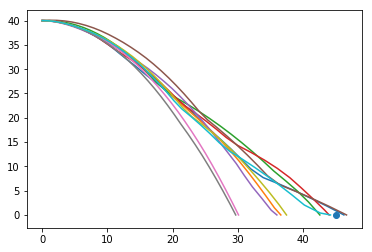

In [8]:
# main learning loop
## policy_matrix = np.random.randint(low = 0, high = NUM_ACTIONS, size = NUM_BUCKETS)
## state_action_matrix = np.zeros((NUM_ACTIONS, num_buckets))

# epsilon greedy determines which action to take during training.

x_target = 45
w_effort = 1.0
w_target = 6.0
num_episodes = 10 # 10
max_step = 1000 # 10k
env = Glider(y_init = 40.0, target_x = x_target, delta_t = 0.01)
for episode in range(num_episodes):
    if episode%1 == 0:
        print('Episode: ' + str(episode))
    epsilon = get_epsilon(0.99, 0.1, episode, 10)
    Y, X, V = [], [], []
    episode_list = list()
    total_cost = 0.0
    state = env.reset()
    # state_disc = get_discrete_states(state_cont, all_state_arrays)
    effort_cost = 0.0
    for step in range(max_step):
        if step%1 == 0:
            action = random.choice(ACTIONS)
        # action = 0.0
        # cost, done = env.step(action)
        cost, done = env.probe_n_step(action, 10, True)
        new_state = env.get_state()
        total_cost += cost
        episode_list.append((state, action, cost))                
        state = new_state
        if done:
            state = env.get_state()
            episode_list.append((state, action, cost))
            break
        effort_cost += cost
    glider_landing_x = episode_list[len(episode_list)-1][0][0]
    target_cost = abs(target_x - glider_landing_x)
    total_cost = w_target*target_cost + w_effort*effort_cost
    
    # plot trajectory
    plot_trajectory(episode_list)
    plt.hold


plt.scatter(x_target,0)
plt.show()

In [ ]:
len(episode_list)

In [ ]:
target_cost*w_target

In [ ]:
total_cost

In [ ]:
state_landing = episode_list[len(episode_list)-1][0]
print(state_landing)
landing_velocity = math.sqrt(state_landing[1]**2 + state_landing[3]**2)
landing_velocity

In [ ]:
len(episode_list)

In [ ]:
# NFQ main learning loop
## policy_matrix = np.random.randint(low = 0, high = NUM_ACTIONS, size = NUM_BUCKETS)
## state_action_matrix = np.zeros((NUM_ACTIONS, num_buckets))

# epsilon greedy determines which action to take during training.

num_input = 5
num_l1 = 10
num_l2 = 10
num_out = 1
W = {
    'h1':tf.Variable(tf.random_normal([num_input,num_l1])),
    'h2':tf.Variable(tf.random_normal([num_l1, num_l2])),
    'out':tf.Variable(tf.random_normal([num_l2, num_out]))
}    
b = {
    'b1':tf.Variable(tf.random_normal([num_l1])),
    'b2':tf.Variable(tf.random_normal([num_l2])),
    'out':tf.Variable(tf.random_normal([num_out]))
}

def multilayer_perceptron(x, W, b):        
    l1 = tf.add(tf.matmul(x, W['h1']), b['b1'])
    l1 = tf.nn.relu(l1)
    l2 = tf.add(tf.matmul(l1, W['h2']), b['b2'])
    l2 = tf.nn.relu(l2)
    out = tf.add(tf.matmul(l2, W['out']), b['out'])
    return out

# neural net

print('0')
sess = tf.Session()
x_Q_net = tf.placeholder("float", [None,num_input])
y_Q_net = tf.placeholder("float", [None,1])
Q_net = multilayer_perceptron(x_Q_net, W, b)
print('1')
sess.run(tf.initialize_all_variables())
"""
sess = tf.Session()
x = tf.placeholder("float", [None,num_input])
y = tf.placeholder("float", [None, 1]) # , name = 'y')   # 3 outputs
y_ = multilayer_perceptron(x, W, b)
sess.run(tf.initialize_all_variables())
"""
# loss = tf.losses.mean_squared_error(labels, predictions)
# train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

w_effort = 1.0
w_target = 6.0
num_episodes = 1 # 10
max_step = 1000 # 10k
print('2')
env = Glider()
for episode in range(num_episodes):
    if episode%100 == 0:
        print('Episode: ' + str(episode))
    epsilon = get_epsilon(0.99, 0.1, episode, 10)
    Y, X, V = [], [], []
    episode_list = list()
    total_cost = 0.0
    state = env.reset()
    # state_disc = get_discrete_states(state_cont, all_state_arrays)
    effort_cost = 0.0
    for step in range(max_step):
        state_action_1 = env.probe_step(1.0)
        state_action_0 = env.probe_step(0.0)
        state_action_minus_1 = env.probe_step(-1.0)
        Q_1 = sess.run(Q_net, {x_Q_net : [state_action_1,]})
        Q_0 = sess.run(Q_net, {x_Q_net : [state_action_0,]})
        Q_m1 = sess.run(Q_net, {x_Q_net : [state_action_minus_1,]})
        min_Q_index = np.argmin([Q_m1 + w_effort/w_target, Q_0, Q_1 + w_effort/w_target])
        # print(Q_1)
        # print(Q_0)
        # print(Q_m1)
        # print(' ')      
        action_opt = ACTIONS[min_Q_index]
        actions_ind0 = ACTIONS[0]
        tot_actions = ACTIONS
        tot_actions[0] = action_opt
        tot_actions[min_Q_index] = actions_ind0
        weight_array = [0.5, 0.25, 0.25]
        action = np.random.choice(tot_actions, 1, p=weight_array)[0]
        # action = np.random.choice(ACTIONS)
        cost, done = env.step(action)
        new_state = env.get_state()
        total_cost += cost
        episode_list.append((state, action, cost))                
        state = new_state
        if done:
            break
        effort_cost += cost
    
    glider_landing_x = episode_list[len(episode_list)-1][0][0]
    target_cost = abs(target_x - glider_landing_x)
    total_cost = w_target*target_cost + w_effort*effort_cost
    
    # train MLP   
    
    A, B = training_data(episode_list, total_cost, w_effort)
    # labels = np.transpose([B])
    # predictions = sess.run(Q_net, {x_Q_net: A})
    y_label = np.transpose([B])
    
    loss = tf.losses.mean_squared_error(y_Q_net, Q_net)
    train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)
    
    for j in range(100):
        _, loss_value = sess.run([train_step, loss], feed_dict={x_Q_net:A, y_Q_net:B})
        if j%10 == 0:
            print(str(loss_value))
    print('   episode: ' + str(episode) + ', \t total_cost: ' + str(total_cost) + ', \t loss: ' + str(loss_value))
    # sess.run([train_step, loss], feed_dict={x_Q_net:[[1,2,3,4,5],], y_Q_net:[[1]]})
    
    # print('   episode: ' + str(episode) + ', \t total_cost: ' + str(total_cost) + ', \t loss: ' + str(sess.run(loss)))
    
    """
    loss = tf.losses.mean_squared_error(y, y_)
    train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
    # print(sess.run(loss))
    
    # print(sess.run([train_step, loss], feed_dict={x:[[1,2,3,4,5],[2,3,4,5,6]], y:[[1],[2]]}))
    print(sess.run([train_step, loss], feed_dict={x:[[1,2,3,4,5],], y:[[1]]}))
    """
    # plot trajectory
    if episode%10 == 0:
        print(episode)
        plot_trajectory(episode_list)
        plt.hold
        plt.show()
    if (episode-1)%10 == 0:
        print(episode)
        plot_trajectory(episode_list)
        plt.hold
        plt.show()

In [ ]:
print(state_action_1)
print(state_action_0)
print(state_action_minus_1)


In [ ]:
s1, s2 = sess.run([train_step, loss], feed_dict={x_Q_net:A, y_Q_net:B})
s2

In [ ]:
action = np.random.choice(ACTIONS)
action

In [ ]:
A, B = training_data(episode_list, total_cost, w_effort)
A

In [ ]:
tot_actions

In [ ]:
# NFQ Reward main learning loop
## policy_matrix = np.random.randint(low = 0, high = NUM_ACTIONS, size = NUM_BUCKETS)
## state_action_matrix = np.zeros((NUM_ACTIONS, num_buckets))

# epsilon greedy determines which action to take during training.

ACTIONS = [-1.0, 0.0, 1.0]
num_input = 5 # 6
num_l1 = 20
num_l2 = 20
num_l3 = 20
num_l4 = 20
num_out = 1
W = {
    'h1':tf.Variable(tf.random_normal([num_input,num_l1])),
    'h2':tf.Variable(tf.random_normal([num_l1, num_l2])),
    'h3':tf.Variable(tf.random_normal([num_l2, num_l3])),
    'h4':tf.Variable(tf.random_normal([num_l3, num_l4])),
    'out':tf.Variable(tf.random_normal([num_l4, num_out]))
}    
b = {
    'b1':tf.Variable(tf.random_normal([num_l1])),
    'b2':tf.Variable(tf.random_normal([num_l2])),
    'b3':tf.Variable(tf.random_normal([num_l3])),
    'b4':tf.Variable(tf.random_normal([num_l4])),
    'out':tf.Variable(tf.random_normal([num_out]))
}

def multilayer_perceptron(x, W, b):        
    l1 = tf.add(tf.matmul(x, W['h1']), b['b1'])
    l1 = tf.nn.relu(l1)
    l2 = tf.add(tf.matmul(l1, W['h2']), b['b2'])
    l2 = tf.nn.relu(l2)
    l3 = tf.add(tf.matmul(l2, W['h3']), b['b3'])
    l3 = tf.nn.relu(l3)
    l4 = tf.add(tf.matmul(l3, W['h4']), b['b4'])
    l4 = tf.nn.relu(l4)
    out = tf.add(tf.matmul(l4, W['out']), b['out'])
    return out

# neural net

print('0')
sess = tf.Session()
x_Q_net = tf.placeholder("float", [None,num_input])
y_Q_net = tf.placeholder("float", [None,1])
Q_net = multilayer_perceptron(x_Q_net, W, b)
print('1')
sess.run(tf.initialize_all_variables())
print('2')
w_effort = 1.0
w_target = 20.0

target_x = 45.0
env = Glider(y_init = 40.0, target_x = x_target, delta_t=0.01)

"""
sess = tf.Session()
x = tf.placeholder("float", [None,num_input])
y = tf.placeholder("float", [None, 1]) # , name = 'y')   # 3 outputs
y_ = multilayer_perceptron(x, W, b)
sess.run(tf.initialize_all_variables())
"""
# loss = tf.losses.mean_squared_error(labels, predictions)
# train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

0
1
Instructions for updating:
Use `tf.global_variables_initializer` instead.
2


'\nsess = tf.Session()\nx = tf.placeholder("float", [None,num_input])\ny = tf.placeholder("float", [None, 1]) # , name = \'y\')   # 3 outputs\ny_ = multilayer_perceptron(x, W, b)\nsess.run(tf.initialize_all_variables())\n'

Episode: 0
new max
new max
Episode: 10


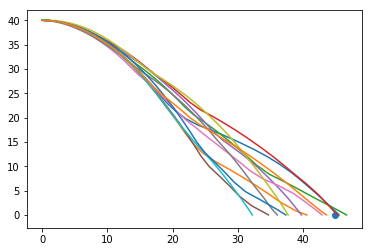

loss: 9.50254e+06, 	 normalized loss: 23996.3080808, 	 len(A): 396
loss: 61375.2, 	 normalized loss: 154.987995186, 	 len(A): 396
loss: 31484.1, 	 normalized loss: 79.5052477904, 	 len(A): 396
loss: 20539.4, 	 normalized loss: 51.8671184501, 	 len(A): 396
loss: 14680.6, 	 normalized loss: 37.0723322088, 	 len(A): 396
loss: 11346.8, 	 normalized loss: 28.6534189552, 	 len(A): 396
loss: 9404.15, 	 normalized loss: 23.7478421914, 	 len(A): 396
loss: 8220.46, 	 normalized loss: 20.7587496054, 	 len(A): 396
loss: 7472.55, 	 normalized loss: 18.8700875947, 	 len(A): 396
loss: 6978.92, 	 normalized loss: 17.6235339232, 	 len(A): 396
loss: 6658.14, 	 normalized loss: 16.8134790286, 	 len(A): 396
loss: 6431.67, 	 normalized loss: 16.24159811, 	 len(A): 396
loss: 6253.67, 	 normalized loss: 15.7920982284, 	 len(A): 396
loss: 6104.47, 	 normalized loss: 15.4153312914, 	 len(A): 396
loss: 5978.18, 	 normalized loss: 15.0964232165, 	 len(A): 396
loss: 5862.17, 	 normalized loss: 14.803471729, 	 len

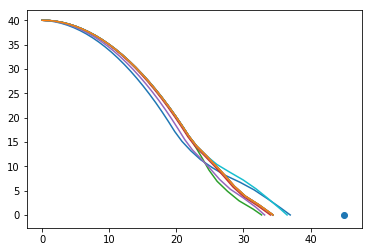

loss: 6243.65, 	 normalized loss: 8.03558294623, 	 len(A): 777
loss: 4707.65, 	 normalized loss: 6.05875211149, 	 len(A): 777
loss: 4551.62, 	 normalized loss: 5.85793969192, 	 len(A): 777
loss: 4444.94, 	 normalized loss: 5.72064531049, 	 len(A): 777
loss: 4361.41, 	 normalized loss: 5.61314174107, 	 len(A): 777
loss: 4296.74, 	 normalized loss: 5.5299152389, 	 len(A): 777
loss: 4241.55, 	 normalized loss: 5.45888131435, 	 len(A): 777
loss: 4193.64, 	 normalized loss: 5.39721899634, 	 len(A): 777
loss: 4150.38, 	 normalized loss: 5.34153796654, 	 len(A): 777
loss: 4110.54, 	 normalized loss: 5.29027032054, 	 len(A): 777
loss: 4072.82, 	 normalized loss: 5.24171901394, 	 len(A): 777
loss: 4036.71, 	 normalized loss: 5.19524777288, 	 len(A): 777
loss: 4002.99, 	 normalized loss: 5.15185295508, 	 len(A): 777
loss: 3970.55, 	 normalized loss: 5.11010679346, 	 len(A): 777
loss: 3939.0, 	 normalized loss: 5.06949367057, 	 len(A): 777
loss: 3908.64, 	 normalized loss: 5.03042834268, 	 len(A)

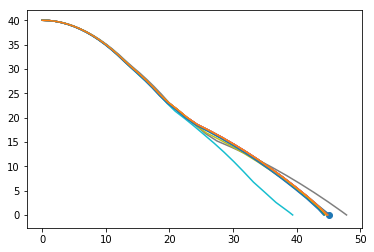

loss: 3526.31, 	 normalized loss: 2.97579278745, 	 len(A): 1185
loss: 3246.08, 	 normalized loss: 2.73931034909, 	 len(A): 1185
loss: 3198.19, 	 normalized loss: 2.6988903448, 	 len(A): 1185
loss: 3163.49, 	 normalized loss: 2.66961592662, 	 len(A): 1185
loss: 3139.69, 	 normalized loss: 2.64952655261, 	 len(A): 1185
loss: 3120.26, 	 normalized loss: 2.63312689544, 	 len(A): 1185
loss: 3103.33, 	 normalized loss: 2.61884703817, 	 len(A): 1185
loss: 3088.26, 	 normalized loss: 2.60612576642, 	 len(A): 1185
loss: 3074.49, 	 normalized loss: 2.5945065269, 	 len(A): 1185
loss: 3061.75, 	 normalized loss: 2.58375733452, 	 len(A): 1185
loss: 3049.59, 	 normalized loss: 2.57349580531, 	 len(A): 1185
loss: 3038.02, 	 normalized loss: 2.56373224057, 	 len(A): 1185
loss: 3027.32, 	 normalized loss: 2.55470274591, 	 len(A): 1185
loss: 3016.85, 	 normalized loss: 2.54586341311, 	 len(A): 1185
loss: 3006.91, 	 normalized loss: 2.53748022152, 	 len(A): 1185
loss: 2997.6, 	 normalized loss: 2.5296223

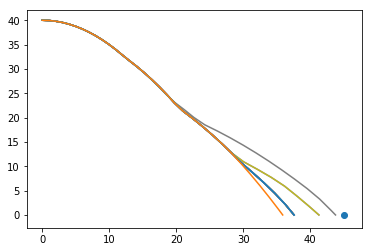

loss: 3286.3, 	 normalized loss: 2.08919389825, 	 len(A): 1573
loss: 3110.45, 	 normalized loss: 1.97739813454, 	 len(A): 1573
loss: 3091.58, 	 normalized loss: 1.96540435772, 	 len(A): 1573
loss: 3079.78, 	 normalized loss: 1.95790196132, 	 len(A): 1573
loss: 3070.64, 	 normalized loss: 1.95209380463, 	 len(A): 1573
loss: 3061.74, 	 normalized loss: 1.9464351123, 	 len(A): 1573
loss: 3052.36, 	 normalized loss: 1.94047330067, 	 len(A): 1573
loss: 3043.12, 	 normalized loss: 1.93459623207, 	 len(A): 1573
loss: 3033.69, 	 normalized loss: 1.92860415508, 	 len(A): 1573
loss: 3022.91, 	 normalized loss: 1.92174773025, 	 len(A): 1573
loss: 3010.01, 	 normalized loss: 1.91354954084, 	 len(A): 1573
loss: 2999.98, 	 normalized loss: 1.90717146401, 	 len(A): 1573
loss: 2990.99, 	 normalized loss: 1.90145550029, 	 len(A): 1573
loss: 2982.71, 	 normalized loss: 1.8961942931, 	 len(A): 1573
loss: 2974.91, 	 normalized loss: 1.89123418751, 	 len(A): 1573
loss: 2967.6, 	 normalized loss: 1.88658791

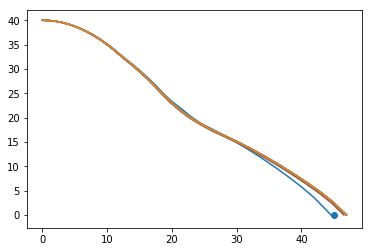

loss: 2575.85, 	 normalized loss: 1.29309829651, 	 len(A): 1992
loss: 2523.65, 	 normalized loss: 1.26689031517, 	 len(A): 1992
loss: 2505.19, 	 normalized loss: 1.25762485979, 	 len(A): 1992
loss: 2492.3, 	 normalized loss: 1.25115623627, 	 len(A): 1992
loss: 2481.78, 	 normalized loss: 1.24587363124, 	 len(A): 1992
loss: 2474.1, 	 normalized loss: 1.24201603778, 	 len(A): 1992
loss: 2468.19, 	 normalized loss: 1.23904958212, 	 len(A): 1992
loss: 2463.19, 	 normalized loss: 1.23654150293, 	 len(A): 1992
loss: 2459.2, 	 normalized loss: 1.23453800554, 	 len(A): 1992
loss: 2455.66, 	 normalized loss: 1.2327614903, 	 len(A): 1992
loss: 2452.49, 	 normalized loss: 1.23116955125, 	 len(A): 1992
loss: 2449.63, 	 normalized loss: 1.22973228363, 	 len(A): 1992
loss: 2447.01, 	 normalized loss: 1.22841622839, 	 len(A): 1992
loss: 2444.55, 	 normalized loss: 1.22718363689, 	 len(A): 1992
loss: 2442.18, 	 normalized loss: 1.22599430927, 	 len(A): 1992
loss: 2439.77, 	 normalized loss: 1.22478304

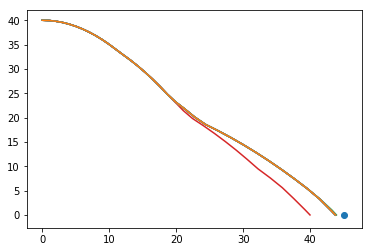

loss: 2216.02, 	 normalized loss: 0.923725136124, 	 len(A): 2399
loss: 2197.83, 	 normalized loss: 0.916143546953, 	 len(A): 2399
loss: 2194.72, 	 normalized loss: 0.914846009242, 	 len(A): 2399
loss: 2192.53, 	 normalized loss: 0.913936104562, 	 len(A): 2399
loss: 2190.47, 	 normalized loss: 0.913074234219, 	 len(A): 2399
loss: 2188.69, 	 normalized loss: 0.912332856789, 	 len(A): 2399
loss: 2187.05, 	 normalized loss: 0.911648672787, 	 len(A): 2399
loss: 2185.51, 	 normalized loss: 0.911007332971, 	 len(A): 2399
loss: 2184.03, 	 normalized loss: 0.910390213859, 	 len(A): 2399
loss: 2182.57, 	 normalized loss: 0.909782457372, 	 len(A): 2399
loss: 2181.15, 	 normalized loss: 0.909191696084, 	 len(A): 2399
loss: 2179.78, 	 normalized loss: 0.908619660047, 	 len(A): 2399
loss: 2178.44, 	 normalized loss: 0.908060446736, 	 len(A): 2399
loss: 2177.13, 	 normalized loss: 0.907514972059, 	 len(A): 2399
loss: 2175.83, 	 normalized loss: 0.906973364553, 	 len(A): 2399
loss: 2174.55, 	 normaliz

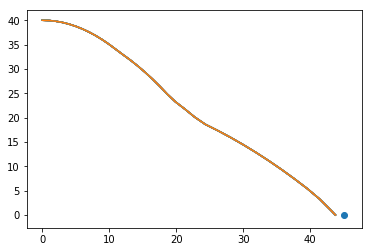

loss: 1965.22, 	 normalized loss: 0.700115338398, 	 len(A): 2807
loss: 1952.31, 	 normalized loss: 0.695516544854, 	 len(A): 2807
loss: 1949.71, 	 normalized loss: 0.694589428006, 	 len(A): 2807
loss: 1947.56, 	 normalized loss: 0.693821389606, 	 len(A): 2807
loss: 1945.59, 	 normalized loss: 0.693122192426, 	 len(A): 2807
loss: 1943.8, 	 normalized loss: 0.692481747292, 	 len(A): 2807
loss: 1942.09, 	 normalized loss: 0.691872874315, 	 len(A): 2807
loss: 1940.44, 	 normalized loss: 0.691286136639, 	 len(A): 2807
loss: 1938.88, 	 normalized loss: 0.690730231828, 	 len(A): 2807
loss: 1937.42, 	 normalized loss: 0.69020998703, 	 len(A): 2807
loss: 1935.99, 	 normalized loss: 0.689702266724, 	 len(A): 2807
loss: 1934.52, 	 normalized loss: 0.689176672924, 	 len(A): 2807
loss: 1933.08, 	 normalized loss: 0.688664299422, 	 len(A): 2807
loss: 1931.68, 	 normalized loss: 0.688166581315, 	 len(A): 2807
loss: 1930.32, 	 normalized loss: 0.687679952602, 	 len(A): 2807
loss: 1928.98, 	 normalized

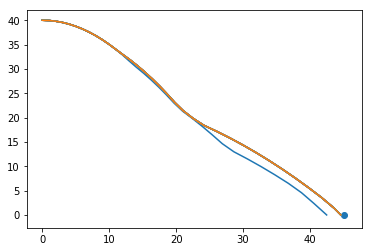

loss: 1875.31, 	 normalized loss: 0.583299034676, 	 len(A): 3215
loss: 1853.61, 	 normalized loss: 0.576549172883, 	 len(A): 3215
loss: 1847.96, 	 normalized loss: 0.574793448678, 	 len(A): 3215
loss: 1843.71, 	 normalized loss: 0.57347258335, 	 len(A): 3215
loss: 1840.4, 	 normalized loss: 0.572442598476, 	 len(A): 3215
loss: 1837.68, 	 normalized loss: 0.571596193684, 	 len(A): 3215
loss: 1835.34, 	 normalized loss: 0.570868517934, 	 len(A): 3215
loss: 1833.14, 	 normalized loss: 0.57018203854, 	 len(A): 3215
loss: 1831.04, 	 normalized loss: 0.569530224837, 	 len(A): 3215
loss: 1829.09, 	 normalized loss: 0.568924733306, 	 len(A): 3215
loss: 1827.24, 	 normalized loss: 0.568348098209, 	 len(A): 3215
loss: 1825.45, 	 normalized loss: 0.567791206989, 	 len(A): 3215
loss: 1823.65, 	 normalized loss: 0.567231126373, 	 len(A): 3215
loss: 1821.92, 	 normalized loss: 0.566692384331, 	 len(A): 3215
loss: 1820.26, 	 normalized loss: 0.566177980414, 	 len(A): 3215
loss: 1818.66, 	 normalized 

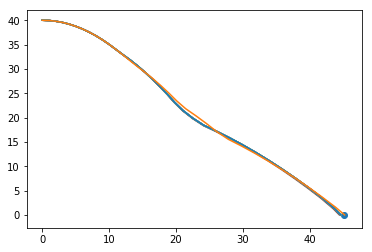

loss: 1725.71, 	 normalized loss: 0.476320279885, 	 len(A): 3623
loss: 1713.85, 	 normalized loss: 0.473047056943, 	 len(A): 3623
loss: 1712.28, 	 normalized loss: 0.472613021678, 	 len(A): 3623
loss: 1710.93, 	 normalized loss: 0.472242228471, 	 len(A): 3623
loss: 1709.31, 	 normalized loss: 0.471793536682, 	 len(A): 3623
loss: 1705.55, 	 normalized loss: 0.47075646127, 	 len(A): 3623
loss: 1703.27, 	 normalized loss: 0.470126971993, 	 len(A): 3623
loss: 1701.35, 	 normalized loss: 0.46959576566, 	 len(A): 3623
loss: 1699.55, 	 normalized loss: 0.469101487027, 	 len(A): 3623
loss: 1697.86, 	 normalized loss: 0.468632377184, 	 len(A): 3623
loss: 1696.21, 	 normalized loss: 0.46817701415, 	 len(A): 3623
loss: 1694.67, 	 normalized loss: 0.467754535638, 	 len(A): 3623
loss: 1693.26, 	 normalized loss: 0.467364604717, 	 len(A): 3623
loss: 1691.92, 	 normalized loss: 0.466994417987, 	 len(A): 3623
loss: 1690.66, 	 normalized loss: 0.466647614309, 	 len(A): 3623
loss: 1689.49, 	 normalized 

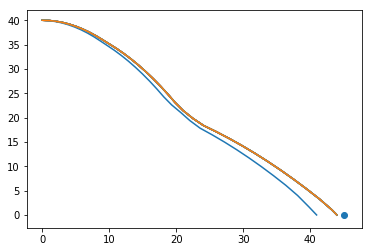

loss: 1574.73, 	 normalized loss: 0.390752431713, 	 len(A): 4030
loss: 1572.71, 	 normalized loss: 0.390250762106, 	 len(A): 4030
loss: 1571.55, 	 normalized loss: 0.389962760982, 	 len(A): 4030
loss: 1570.55, 	 normalized loss: 0.389714622024, 	 len(A): 4030
loss: 1569.65, 	 normalized loss: 0.389492320778, 	 len(A): 4030
loss: 1568.77, 	 normalized loss: 0.389273502927, 	 len(A): 4030
loss: 1567.9, 	 normalized loss: 0.389058289634, 	 len(A): 4030
loss: 1567.07, 	 normalized loss: 0.388852193752, 	 len(A): 4030
loss: 1566.27, 	 normalized loss: 0.388653337275, 	 len(A): 4030
loss: 1565.5, 	 normalized loss: 0.388461053815, 	 len(A): 4030
loss: 1564.74, 	 normalized loss: 0.3882736774, 	 len(A): 4030
loss: 1564.01, 	 normalized loss: 0.388091692676, 	 len(A): 4030
loss: 1563.29, 	 normalized loss: 0.38791261583, 	 len(A): 4030
loss: 1562.58, 	 normalized loss: 0.387737900803, 	 len(A): 4030
loss: 1561.9, 	 normalized loss: 0.387567002365, 	 len(A): 4030
loss: 1561.23, 	 normalized los

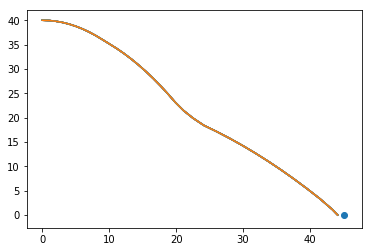

loss: 1449.79, 	 normalized loss: 0.326677209786, 	 len(A): 4438
loss: 1447.67, 	 normalized loss: 0.326199463221, 	 len(A): 4438
loss: 1446.93, 	 normalized loss: 0.326032971197, 	 len(A): 4438
loss: 1446.29, 	 normalized loss: 0.325887851105, 	 len(A): 4438
loss: 1445.59, 	 normalized loss: 0.325731041089, 	 len(A): 4438
loss: 1444.96, 	 normalized loss: 0.32558916667, 	 len(A): 4438
loss: 1444.4, 	 normalized loss: 0.325462200342, 	 len(A): 4438
loss: 1443.86, 	 normalized loss: 0.325340597626, 	 len(A): 4438
loss: 1443.35, 	 normalized loss: 0.325225321223, 	 len(A): 4438
loss: 1442.85, 	 normalized loss: 0.325111997724, 	 len(A): 4438
loss: 1442.35, 	 normalized loss: 0.32500043459, 	 len(A): 4438
loss: 1441.87, 	 normalized loss: 0.324891622027, 	 len(A): 4438
loss: 1441.39, 	 normalized loss: 0.324784707357, 	 len(A): 4438
loss: 1440.81, 	 normalized loss: 0.324653450139, 	 len(A): 4438
loss: 1440.17, 	 normalized loss: 0.324509815355, 	 len(A): 4438
loss: 1439.55, 	 normalized 

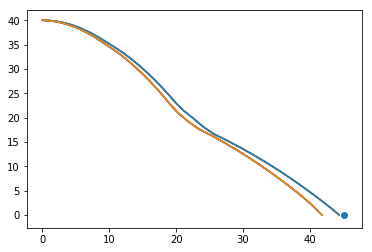

loss: 1399.59, 	 normalized loss: 0.289171278772, 	 len(A): 4840
loss: 1398.9, 	 normalized loss: 0.289028451462, 	 len(A): 4840
loss: 1398.34, 	 normalized loss: 0.288912610771, 	 len(A): 4840
loss: 1397.82, 	 normalized loss: 0.288805168719, 	 len(A): 4840
loss: 1397.29, 	 normalized loss: 0.288695582871, 	 len(A): 4840
loss: 1396.76, 	 normalized loss: 0.288587611175, 	 len(A): 4840
loss: 1396.29, 	 normalized loss: 0.288490232357, 	 len(A): 4840
loss: 1395.85, 	 normalized loss: 0.288397771662, 	 len(A): 4840
loss: 1395.41, 	 normalized loss: 0.288308514051, 	 len(A): 4840
loss: 1394.99, 	 normalized loss: 0.28822145068, 	 len(A): 4840
loss: 1394.58, 	 normalized loss: 0.288136833758, 	 len(A): 4840
loss: 1394.17, 	 normalized loss: 0.288051157549, 	 len(A): 4840
loss: 1393.75, 	 normalized loss: 0.287964699485, 	 len(A): 4840
loss: 1393.34, 	 normalized loss: 0.28788066265, 	 len(A): 4840
loss: 1392.94, 	 normalized loss: 0.287797357228, 	 len(A): 4840
loss: 1392.55, 	 normalized 

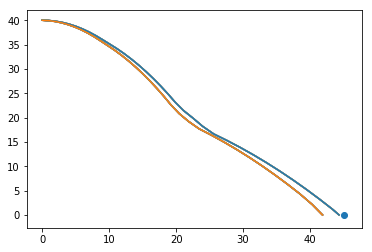

loss: 1351.59, 	 normalized loss: 0.257838255392, 	 len(A): 5242
loss: 1351.03, 	 normalized loss: 0.257731507908, 	 len(A): 5242
loss: 1350.56, 	 normalized loss: 0.257642411949, 	 len(A): 5242
loss: 1350.11, 	 normalized loss: 0.257557135054, 	 len(A): 5242
loss: 1349.69, 	 normalized loss: 0.257475258057, 	 len(A): 5242
loss: 1349.26, 	 normalized loss: 0.257394033095, 	 len(A): 5242
loss: 1348.84, 	 normalized loss: 0.25731460123, 	 len(A): 5242
loss: 1348.44, 	 normalized loss: 0.257237195332, 	 len(A): 5242
loss: 1348.04, 	 normalized loss: 0.2571618154, 	 len(A): 5242
loss: 1347.66, 	 normalized loss: 0.257088554583, 	 len(A): 5242
loss: 1347.27, 	 normalized loss: 0.257014525296, 	 len(A): 5242
loss: 1346.89, 	 normalized loss: 0.256942382254, 	 len(A): 5242
loss: 1346.53, 	 normalized loss: 0.256873056935, 	 len(A): 5242
loss: 1346.15, 	 normalized loss: 0.256800494727, 	 len(A): 5242
loss: 1345.68, 	 normalized loss: 0.256710746733, 	 len(A): 5242
loss: 1345.2, 	 normalized l

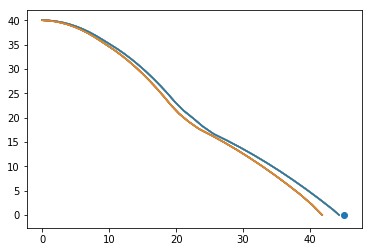

loss: 1303.75, 	 normalized loss: 0.230998362995, 	 len(A): 5644
loss: 1303.17, 	 normalized loss: 0.230894590252, 	 len(A): 5644
loss: 1302.66, 	 normalized loss: 0.230805243608, 	 len(A): 5644
loss: 1302.19, 	 normalized loss: 0.230721433817, 	 len(A): 5644
loss: 1301.73, 	 normalized loss: 0.230640349195, 	 len(A): 5644
loss: 1301.28, 	 normalized loss: 0.230560151336, 	 len(A): 5644
loss: 1300.83, 	 normalized loss: 0.230480277902, 	 len(A): 5644
loss: 1300.41, 	 normalized loss: 0.230405746665, 	 len(A): 5644
loss: 1299.99, 	 normalized loss: 0.230331799394, 	 len(A): 5644
loss: 1299.58, 	 normalized loss: 0.230258392831, 	 len(A): 5644
loss: 1299.17, 	 normalized loss: 0.230186608394, 	 len(A): 5644
loss: 1298.77, 	 normalized loss: 0.230115775602, 	 len(A): 5644
loss: 1298.38, 	 normalized loss: 0.230046067485, 	 len(A): 5644
loss: 1297.99, 	 normalized loss: 0.229976813562, 	 len(A): 5644
loss: 1297.61, 	 normalized loss: 0.229908922224, 	 len(A): 5644
loss: 1297.23, 	 normaliz

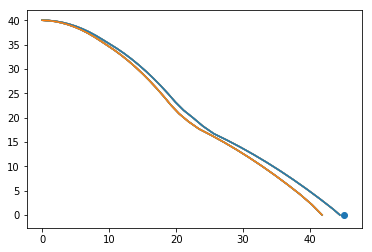

loss: 1259.19, 	 normalized loss: 0.208268832182, 	 len(A): 6046
loss: 1258.67, 	 normalized loss: 0.20818245825, 	 len(A): 6046
loss: 1258.2, 	 normalized loss: 0.208103756616, 	 len(A): 6046
loss: 1257.72, 	 normalized loss: 0.208025600119, 	 len(A): 6046
loss: 1257.25, 	 normalized loss: 0.207946999437, 	 len(A): 6046
loss: 1256.78, 	 normalized loss: 0.207870034165, 	 len(A): 6046
loss: 1256.31, 	 normalized loss: 0.20779125177, 	 len(A): 6046
loss: 1255.82, 	 normalized loss: 0.207711641575, 	 len(A): 6046
loss: 1255.37, 	 normalized loss: 0.207636432856, 	 len(A): 6046
loss: 1254.94, 	 normalized loss: 0.207564616101, 	 len(A): 6046
loss: 1254.52, 	 normalized loss: 0.207496171119, 	 len(A): 6046
loss: 1254.12, 	 normalized loss: 0.20743022973, 	 len(A): 6046
loss: 1253.74, 	 normalized loss: 0.207366711171, 	 len(A): 6046
loss: 1253.34, 	 normalized loss: 0.207300547689, 	 len(A): 6046
loss: 1252.95, 	 normalized loss: 0.207236342662, 	 len(A): 6046
loss: 1252.57, 	 normalized l

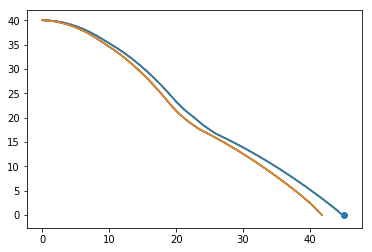

loss: 1227.32, 	 normalized loss: 0.190341618162, 	 len(A): 6448
loss: 1226.9, 	 normalized loss: 0.190276115171, 	 len(A): 6448
loss: 1226.53, 	 normalized loss: 0.190219017767, 	 len(A): 6448
loss: 1226.17, 	 normalized loss: 0.190162204335, 	 len(A): 6448
loss: 1225.81, 	 normalized loss: 0.190107075807, 	 len(A): 6448
loss: 1225.46, 	 normalized loss: 0.190052004073, 	 len(A): 6448
loss: 1225.1, 	 normalized loss: 0.189997594942, 	 len(A): 6448
loss: 1224.76, 	 normalized loss: 0.189944340633, 	 len(A): 6448
loss: 1224.42, 	 normalized loss: 0.189891105254, 	 len(A): 6448
loss: 1224.08, 	 normalized loss: 0.189838570342, 	 len(A): 6448
loss: 1223.75, 	 normalized loss: 0.189787114524, 	 len(A): 6448
loss: 1223.42, 	 normalized loss: 0.189736340241, 	 len(A): 6448
loss: 1223.1, 	 normalized loss: 0.189685963519, 	 len(A): 6448
loss: 1222.77, 	 normalized loss: 0.189636192606, 	 len(A): 6448
loss: 1222.45, 	 normalized loss: 0.189586478487, 	 len(A): 6448
loss: 1222.13, 	 normalized 

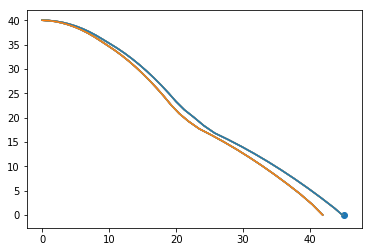

loss: 1194.96, 	 normalized loss: 0.17444649578, 	 len(A): 6850
loss: 1194.58, 	 normalized loss: 0.174391287922, 	 len(A): 6850
loss: 1194.24, 	 normalized loss: 0.174341408388, 	 len(A): 6850
loss: 1193.9, 	 normalized loss: 0.174292063469, 	 len(A): 6850
loss: 1193.57, 	 normalized loss: 0.174243894702, 	 len(A): 6850
loss: 1193.26, 	 normalized loss: 0.174198416828, 	 len(A): 6850
loss: 1192.96, 	 normalized loss: 0.174154239849, 	 len(A): 6850
loss: 1192.67, 	 normalized loss: 0.174112842866, 	 len(A): 6850
loss: 1192.39, 	 normalized loss: 0.17407098255, 	 len(A): 6850
loss: 1192.11, 	 normalized loss: 0.174031385436, 	 len(A): 6850
loss: 1191.84, 	 normalized loss: 0.17399062999, 	 len(A): 6850
loss: 1191.57, 	 normalized loss: 0.173951407105, 	 len(A): 6850
loss: 1191.29, 	 normalized loss: 0.173911489222, 	 len(A): 6850
loss: 1191.03, 	 normalized loss: 0.173873317746, 	 len(A): 6850
loss: 1190.77, 	 normalized loss: 0.173834807681, 	 len(A): 6850
loss: 1190.52, 	 normalized l

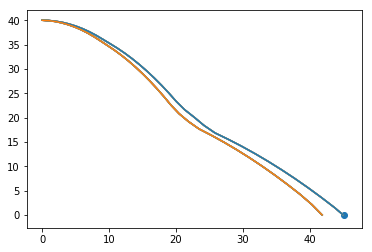

loss: 1170.9, 	 normalized loss: 0.161459483564, 	 len(A): 7252
loss: 1170.6, 	 normalized loss: 0.161417822777, 	 len(A): 7252
loss: 1170.36, 	 normalized loss: 0.161384628809, 	 len(A): 7252
loss: 1170.12, 	 normalized loss: 0.161351502172, 	 len(A): 7252
loss: 1169.89, 	 normalized loss: 0.161319250832, 	 len(A): 7252
loss: 1169.65, 	 normalized loss: 0.161287150985, 	 len(A): 7252
loss: 1169.42, 	 normalized loss: 0.161255286796, 	 len(A): 7252
loss: 1169.19, 	 normalized loss: 0.161223372109, 	 len(A): 7252
loss: 1168.97, 	 normalized loss: 0.161192097062, 	 len(A): 7252
loss: 1168.74, 	 normalized loss: 0.161161730977, 	 len(A): 7252
loss: 1168.52, 	 normalized loss: 0.16113134806, 	 len(A): 7252
loss: 1168.3, 	 normalized loss: 0.161100510662, 	 len(A): 7252
loss: 1168.09, 	 normalized loss: 0.161070767385, 	 len(A): 7252
loss: 1167.86, 	 normalized loss: 0.161040182477, 	 len(A): 7252
loss: 1167.65, 	 normalized loss: 0.161010068882, 	 len(A): 7252
loss: 1167.43, 	 normalized l

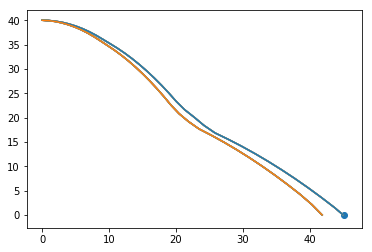

loss: 1148.68, 	 normalized loss: 0.150076071463, 	 len(A): 7654
loss: 1148.38, 	 normalized loss: 0.150037061274, 	 len(A): 7654
loss: 1148.15, 	 normalized loss: 0.150006679259, 	 len(A): 7654
loss: 1147.92, 	 normalized loss: 0.149976600266, 	 len(A): 7654
loss: 1147.69, 	 normalized loss: 0.149947015679, 	 len(A): 7654
loss: 1147.47, 	 normalized loss: 0.149917558681, 	 len(A): 7654
loss: 1147.24, 	 normalized loss: 0.149887766762, 	 len(A): 7654
loss: 1147.02, 	 normalized loss: 0.149858517095, 	 len(A): 7654
loss: 1146.79, 	 normalized loss: 0.149829028199, 	 len(A): 7654
loss: 1146.57, 	 normalized loss: 0.14980024104, 	 len(A): 7654
loss: 1146.35, 	 normalized loss: 0.149771725007, 	 len(A): 7654
loss: 1146.13, 	 normalized loss: 0.149743017591, 	 len(A): 7654
loss: 1145.91, 	 normalized loss: 0.149714501558, 	 len(A): 7654
loss: 1145.69, 	 normalized loss: 0.149685602759, 	 len(A): 7654
loss: 1145.47, 	 normalized loss: 0.14965670396, 	 len(A): 7654
loss: 1145.26, 	 normalized

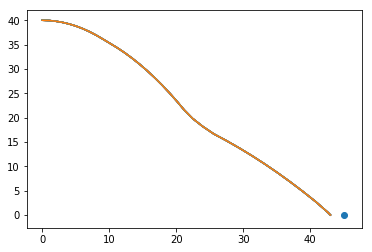

loss: 1105.92, 	 normalized loss: 0.137176869496, 	 len(A): 8062
loss: 1105.46, 	 normalized loss: 0.137120028519, 	 len(A): 8062
loss: 1105.13, 	 normalized loss: 0.137079282896, 	 len(A): 8062
loss: 1104.8, 	 normalized loss: 0.137037371383, 	 len(A): 8062
loss: 1104.5, 	 normalized loss: 0.137000214282, 	 len(A): 8062
loss: 1104.21, 	 normalized loss: 0.136964843871, 	 len(A): 8062
loss: 1103.95, 	 normalized loss: 0.136932047506, 	 len(A): 8062
loss: 1103.69, 	 normalized loss: 0.136900568446, 	 len(A): 8062
loss: 1103.45, 	 normalized loss: 0.13686996759, 	 len(A): 8062
loss: 1103.2, 	 normalized loss: 0.136839124471, 	 len(A): 8062
loss: 1102.95, 	 normalized loss: 0.136808039089, 	 len(A): 8062
loss: 1102.7, 	 normalized loss: 0.136777968183, 	 len(A): 8062
loss: 1102.47, 	 normalized loss: 0.13674897232, 	 len(A): 8062
loss: 1102.23, 	 normalized loss: 0.136719022546, 	 len(A): 8062
loss: 1101.98, 	 normalized loss: 0.136688300558, 	 len(A): 8062
loss: 1101.75, 	 normalized los

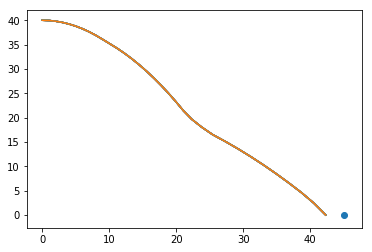

loss: 1081.52, 	 normalized loss: 0.127688169873, 	 len(A): 8470
loss: 1080.76, 	 normalized loss: 0.127598915866, 	 len(A): 8470
loss: 1080.54, 	 normalized loss: 0.127572339991, 	 len(A): 8470
loss: 1080.33, 	 normalized loss: 0.127547695336, 	 len(A): 8470
loss: 1080.12, 	 normalized loss: 0.127523180389, 	 len(A): 8470
loss: 1079.93, 	 normalized loss: 0.127501029022, 	 len(A): 8470
loss: 1079.75, 	 normalized loss: 0.127479266783, 	 len(A): 8470
loss: 1079.57, 	 normalized loss: 0.12745818191, 	 len(A): 8470
loss: 1079.4, 	 normalized loss: 0.127437601461, 	 len(A): 8470
loss: 1079.23, 	 normalized loss: 0.127417554259, 	 len(A): 8470
loss: 1079.05, 	 normalized loss: 0.12739718999, 	 len(A): 8470
loss: 1078.89, 	 normalized loss: 0.127377690447, 	 len(A): 8470
loss: 1078.72, 	 normalized loss: 0.127357657657, 	 len(A): 8470
loss: 1078.55, 	 normalized loss: 0.127338028404, 	 len(A): 8470
loss: 1078.39, 	 normalized loss: 0.12731838474, 	 len(A): 8470
loss: 1078.22, 	 normalized l

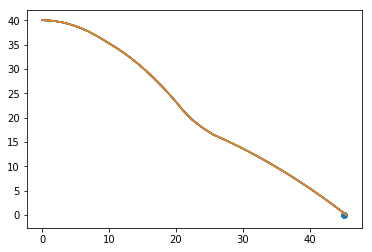

loss: 1077.28, 	 normalized loss: 0.121342414294, 	 len(A): 8878
loss: 1075.38, 	 normalized loss: 0.12112837188, 	 len(A): 8878
loss: 1075.08, 	 normalized loss: 0.121095262473, 	 len(A): 8878
loss: 1074.82, 	 normalized loss: 0.121065961748, 	 len(A): 8878
loss: 1074.58, 	 normalized loss: 0.121038228495, 	 len(A): 8878
loss: 1074.34, 	 normalized loss: 0.121011608972, 	 len(A): 8878
loss: 1074.12, 	 normalized loss: 0.120986405674, 	 len(A): 8878
loss: 1073.91, 	 normalized loss: 0.120962536101, 	 len(A): 8878
loss: 1073.7, 	 normalized loss: 0.120939230269, 	 len(A): 8878
loss: 1073.49, 	 normalized loss: 0.12091629568, 	 len(A): 8878
loss: 1073.3, 	 normalized loss: 0.120894406072, 	 len(A): 8878
loss: 1073.12, 	 normalized loss: 0.120873657694, 	 len(A): 8878
loss: 1072.94, 	 normalized loss: 0.120853569304, 	 len(A): 8878
loss: 1072.77, 	 normalized loss: 0.12083423715, 	 len(A): 8878
loss: 1072.6, 	 normalized loss: 0.120815647484, 	 len(A): 8878
loss: 1072.44, 	 normalized los

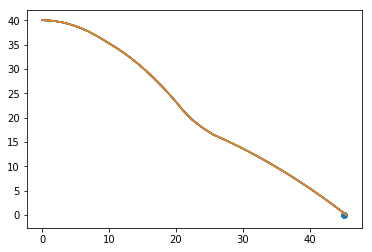

loss: 1065.86, 	 normalized loss: 0.114781600094, 	 len(A): 9286
loss: 1064.3, 	 normalized loss: 0.114612862798, 	 len(A): 9286
loss: 1064.0, 	 normalized loss: 0.114581431599, 	 len(A): 9286
loss: 1063.75, 	 normalized loss: 0.114553773195, 	 len(A): 9286
loss: 1063.5, 	 normalized loss: 0.114526903529, 	 len(A): 9286
loss: 1063.27, 	 normalized loss: 0.114502426368, 	 len(A): 9286
loss: 1063.04, 	 normalized loss: 0.114478198973, 	 len(A): 9286
loss: 1062.83, 	 normalized loss: 0.114454904918, 	 len(A): 9286
loss: 1062.61, 	 normalized loss: 0.114431689737, 	 len(A): 9286
loss: 1062.41, 	 normalized loss: 0.114409355313, 	 len(A): 9286
loss: 1062.2, 	 normalized loss: 0.114387323239, 	 len(A): 9286
loss: 1062.0, 	 normalized loss: 0.114365869572, 	 len(A): 9286
loss: 1061.81, 	 normalized loss: 0.11434536239, 	 len(A): 9286
loss: 1061.62, 	 normalized loss: 0.114324828918, 	 len(A): 9286
loss: 1061.43, 	 normalized loss: 0.114304742396, 	 len(A): 9286
loss: 1061.26, 	 normalized los

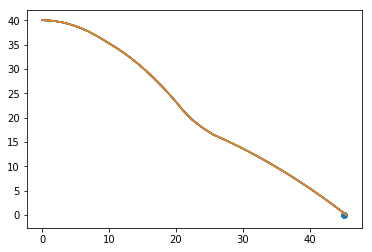

loss: 1048.43, 	 normalized loss: 0.108152609499, 	 len(A): 9694
loss: 1047.08, 	 normalized loss: 0.108013703205, 	 len(A): 9694
loss: 1046.74, 	 normalized loss: 0.107978268311, 	 len(A): 9694
loss: 1046.42, 	 normalized loss: 0.107945263742, 	 len(A): 9694
loss: 1046.12, 	 normalized loss: 0.107914513206, 	 len(A): 9694
loss: 1045.84, 	 normalized loss: 0.107885223382, 	 len(A): 9694
loss: 1045.55, 	 normalized loss: 0.107855681712, 	 len(A): 9694
loss: 1045.28, 	 normalized loss: 0.107827915564, 	 len(A): 9694
loss: 1045.02, 	 normalized loss: 0.107800527187, 	 len(A): 9694
loss: 1044.76, 	 normalized loss: 0.107773403249, 	 len(A): 9694
loss: 1044.5, 	 normalized loss: 0.107746883744, 	 len(A): 9694
loss: 1044.25, 	 normalized loss: 0.107720830157, 	 len(A): 9694
loss: 1044.0, 	 normalized loss: 0.107695343225, 	 len(A): 9694
loss: 1043.74, 	 normalized loss: 0.107668899275, 	 len(A): 9694
loss: 1043.51, 	 normalized loss: 0.107644419732, 	 len(A): 9694
loss: 1043.26, 	 normalized

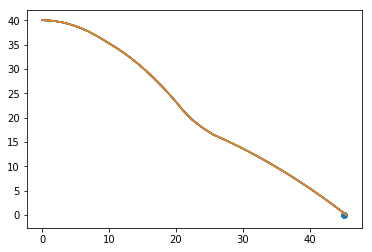

loss: 1025.28, 	 normalized loss: 0.101492341592, 	 len(A): 10102
loss: 1024.15, 	 normalized loss: 0.101380506239, 	 len(A): 10102
loss: 1023.82, 	 normalized loss: 0.10134841777, 	 len(A): 10102
loss: 1023.42, 	 normalized loss: 0.101309054867, 	 len(A): 10102
loss: 1023.07, 	 normalized loss: 0.101274338176, 	 len(A): 10102
loss: 1022.75, 	 normalized loss: 0.101242183247, 	 len(A): 10102
loss: 1022.44, 	 normalized loss: 0.101211357532, 	 len(A): 10102
loss: 1022.14, 	 normalized loss: 0.101182108751, 	 len(A): 10102
loss: 1021.85, 	 normalized loss: 0.101153325194, 	 len(A): 10102
loss: 1021.56, 	 normalized loss: 0.101124233502, 	 len(A): 10102
loss: 1021.28, 	 normalized loss: 0.101096573737, 	 len(A): 10102
loss: 1021.0, 	 normalized loss: 0.101068642087, 	 len(A): 10102
loss: 1020.71, 	 normalized loss: 0.10104078294, 	 len(A): 10102
loss: 1020.44, 	 normalized loss: 0.101013564233, 	 len(A): 10102
loss: 1020.17, 	 normalized loss: 0.100986665746, 	 len(A): 10102
loss: 1019.91

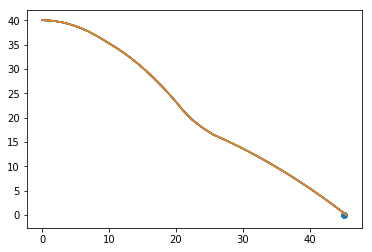

loss: 1000.12, 	 normalized loss: 0.0951593662193, 	 len(A): 10510
loss: 999.211, 	 normalized loss: 0.0950723954771, 	 len(A): 10510
loss: 998.95, 	 normalized loss: 0.0950475574787, 	 len(A): 10510
loss: 998.694, 	 normalized loss: 0.095023207297, 	 len(A): 10510
loss: 998.451, 	 normalized loss: 0.0950001231156, 	 len(A): 10510
loss: 998.21, 	 normalized loss: 0.0949771434664, 	 len(A): 10510
loss: 997.982, 	 normalized loss: 0.0949554530469, 	 len(A): 10510
loss: 997.751, 	 normalized loss: 0.0949335012971, 	 len(A): 10510
loss: 997.527, 	 normalized loss: 0.0949121651255, 	 len(A): 10510
loss: 997.304, 	 normalized loss: 0.094890985752, 	 len(A): 10510
loss: 997.082, 	 normalized loss: 0.094869829608, 	 len(A): 10510
loss: 996.862, 	 normalized loss: 0.0948489464089, 	 len(A): 10510
loss: 996.636, 	 normalized loss: 0.0948274418244, 	 len(A): 10510
loss: 996.357, 	 normalized loss: 0.0948008674309, 	 len(A): 10510
loss: 996.082, 	 normalized loss: 0.0947747111661, 	 len(A): 10510


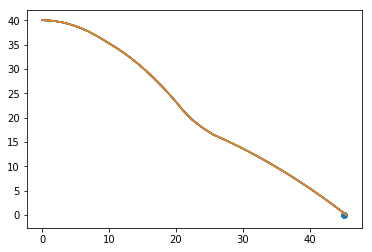

loss: 973.009, 	 normalized loss: 0.0891197080205, 	 len(A): 10918
loss: 972.239, 	 normalized loss: 0.0890491972653, 	 len(A): 10918
loss: 971.984, 	 normalized loss: 0.0890258017598, 	 len(A): 10918
loss: 971.742, 	 normalized loss: 0.0890037032094, 	 len(A): 10918
loss: 971.505, 	 normalized loss: 0.0889819177172, 	 len(A): 10918
loss: 971.281, 	 normalized loss: 0.0889614124092, 	 len(A): 10918
loss: 971.064, 	 normalized loss: 0.0889415499884, 	 len(A): 10918
loss: 970.843, 	 normalized loss: 0.0889213241966, 	 len(A): 10918
loss: 970.635, 	 normalized loss: 0.0889022891437, 	 len(A): 10918
loss: 970.418, 	 normalized loss: 0.0888824323133, 	 len(A): 10918
loss: 970.207, 	 normalized loss: 0.08886304507, 	 len(A): 10918
loss: 969.994, 	 normalized loss: 0.0888435404299, 	 len(A): 10918
loss: 969.788, 	 normalized loss: 0.0888247233997, 	 len(A): 10918
loss: 969.585, 	 normalized loss: 0.0888060684889, 	 len(A): 10918
loss: 969.372, 	 normalized loss: 0.0887865973908, 	 len(A): 109

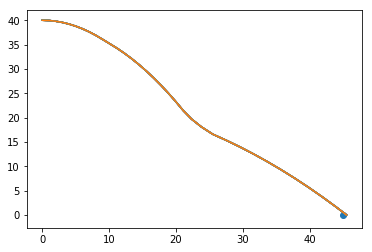

loss: 942.798, 	 normalized loss: 0.083241935082, 	 len(A): 11326
loss: 942.262, 	 normalized loss: 0.0831945770603, 	 len(A): 11326
loss: 942.014, 	 normalized loss: 0.0831726710114, 	 len(A): 11326
loss: 941.77, 	 normalized loss: 0.0831511152437, 	 len(A): 11326
loss: 941.54, 	 normalized loss: 0.0831308204884, 	 len(A): 11326
loss: 941.31, 	 normalized loss: 0.0831105742336, 	 len(A): 11326
loss: 941.074, 	 normalized loss: 0.0830896813057, 	 len(A): 11326
loss: 940.854, 	 normalized loss: 0.0830702380033, 	 len(A): 11326
loss: 940.628, 	 normalized loss: 0.0830503528076, 	 len(A): 11326
loss: 940.392, 	 normalized loss: 0.083029524547, 	 len(A): 11326
loss: 940.166, 	 normalized loss: 0.0830095207946, 	 len(A): 11326
loss: 939.946, 	 normalized loss: 0.0829900936589, 	 len(A): 11326
loss: 939.716, 	 normalized loss: 0.0829697935147, 	 len(A): 11326
loss: 939.496, 	 normalized loss: 0.0829503502122, 	 len(A): 11326
loss: 939.264, 	 normalized loss: 0.0829298883998, 	 len(A): 11326


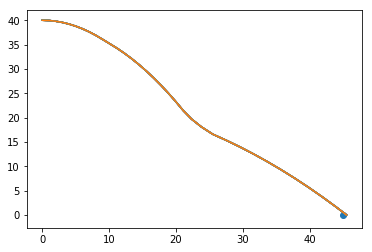

loss: 908.067, 	 normalized loss: 0.0773877094608, 	 len(A): 11734
loss: 907.414, 	 normalized loss: 0.077332005908, 	 len(A): 11734
loss: 907.013, 	 normalized loss: 0.077297821227, 	 len(A): 11734
loss: 906.625, 	 normalized loss: 0.0772647652854, 	 len(A): 11734
loss: 906.238, 	 normalized loss: 0.0772318133752, 	 len(A): 11734
loss: 905.852, 	 normalized loss: 0.07719894469, 	 len(A): 11734
loss: 905.464, 	 normalized loss: 0.0771658679422, 	 len(A): 11734
loss: 905.082, 	 normalized loss: 0.077133321754, 	 len(A): 11734
loss: 904.697, 	 normalized loss: 0.0771004634719, 	 len(A): 11734
loss: 904.331, 	 normalized loss: 0.0770692592872, 	 len(A): 11734
loss: 903.989, 	 normalized loss: 0.0770401305268, 	 len(A): 11734
loss: 903.646, 	 normalized loss: 0.0770109237429, 	 len(A): 11734
loss: 903.309, 	 normalized loss: 0.0769822111076, 	 len(A): 11734
loss: 902.972, 	 normalized loss: 0.0769535036739, 	 len(A): 11734
loss: 902.638, 	 normalized loss: 0.0769250303106, 	 len(A): 11734


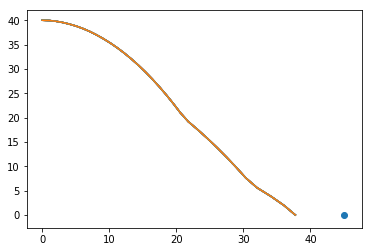

loss: 1064.99, 	 normalized loss: 0.0878845909913, 	 len(A): 12118
loss: 1061.04, 	 normalized loss: 0.0875594092982, 	 len(A): 12118
loss: 1060.34, 	 normalized loss: 0.0875012350075, 	 len(A): 12118
loss: 1059.83, 	 normalized loss: 0.087459067461, 	 len(A): 12118
loss: 1059.42, 	 normalized loss: 0.0874252206009, 	 len(A): 12118
loss: 1059.04, 	 normalized loss: 0.0873935697574, 	 len(A): 12118
loss: 1058.69, 	 normalized loss: 0.0873653640407, 	 len(A): 12118
loss: 1058.38, 	 normalized loss: 0.087339858014, 	 len(A): 12118
loss: 1058.09, 	 normalized loss: 0.0873152888201, 	 len(A): 12118
loss: 1057.82, 	 normalized loss: 0.0872929156427, 	 len(A): 12118
loss: 1057.56, 	 normalized loss: 0.0872719326041, 	 len(A): 12118
loss: 1057.32, 	 normalized loss: 0.0872516849289, 	 len(A): 12118
loss: 1057.07, 	 normalized loss: 0.0872311954904, 	 len(A): 12118
loss: 1056.82, 	 normalized loss: 0.0872109679622, 	 len(A): 12118
loss: 1056.58, 	 normalized loss: 0.0871910930054, 	 len(A): 121

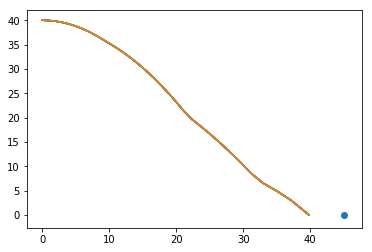

loss: 1123.95, 	 normalized loss: 0.0898157052383, 	 len(A): 12514
loss: 1122.22, 	 normalized loss: 0.0896767788046, 	 len(A): 12514
loss: 1121.77, 	 normalized loss: 0.0896409497925, 	 len(A): 12514
loss: 1121.41, 	 normalized loss: 0.0896120368625, 	 len(A): 12514
loss: 1121.09, 	 normalized loss: 0.0895869087559, 	 len(A): 12514
loss: 1120.8, 	 normalized loss: 0.0895634877219, 	 len(A): 12514
loss: 1120.52, 	 normalized loss: 0.0895412665159, 	 len(A): 12514
loss: 1120.26, 	 normalized loss: 0.0895204792507, 	 len(A): 12514
loss: 1120.01, 	 normalized loss: 0.089500491871, 	 len(A): 12514
loss: 1119.72, 	 normalized loss: 0.0894772074027, 	 len(A): 12514
loss: 1119.41, 	 normalized loss: 0.0894522743902, 	 len(A): 12514
loss: 1119.07, 	 normalized loss: 0.0894257513616, 	 len(A): 12514
loss: 1118.75, 	 normalized loss: 0.0894001355201, 	 len(A): 12514
loss: 1118.45, 	 normalized loss: 0.0893755536768, 	 len(A): 12514
loss: 1118.15, 	 normalized loss: 0.0893519570581, 	 len(A): 125

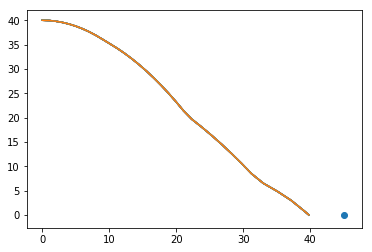

loss: 1175.62, 	 normalized loss: 0.0910629307919, 	 len(A): 12910
loss: 1173.27, 	 normalized loss: 0.0908803642858, 	 len(A): 12910
loss: 1172.64, 	 normalized loss: 0.0908321224009, 	 len(A): 12910
loss: 1172.23, 	 normalized loss: 0.0908000493955, 	 len(A): 12910
loss: 1171.86, 	 normalized loss: 0.0907716451182, 	 len(A): 12910
loss: 1171.54, 	 normalized loss: 0.0907467582815, 	 len(A): 12910
loss: 1171.24, 	 normalized loss: 0.0907232519456, 	 len(A): 12910
loss: 1170.94, 	 normalized loss: 0.090700473682, 	 len(A): 12910
loss: 1170.67, 	 normalized loss: 0.0906790002753, 	 len(A): 12910
loss: 1170.4, 	 normalized loss: 0.0906581603862, 	 len(A): 12910
loss: 1170.12, 	 normalized loss: 0.0906367248015, 	 len(A): 12910
loss: 1169.86, 	 normalized loss: 0.0906163860531, 	 len(A): 12910
loss: 1169.59, 	 normalized loss: 0.0905956974517, 	 len(A): 12910
loss: 1169.32, 	 normalized loss: 0.0905748291961, 	 len(A): 12910
loss: 1169.06, 	 normalized loss: 0.0905542256941, 	 len(A): 129

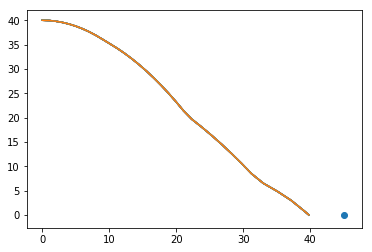

loss: 1214.69, 	 normalized loss: 0.0912892547887, 	 len(A): 13306
loss: 1212.96, 	 normalized loss: 0.0911589920225, 	 len(A): 13306
loss: 1212.39, 	 normalized loss: 0.0911158738451, 	 len(A): 13306
loss: 1211.95, 	 normalized loss: 0.0910829022005, 	 len(A): 13306
loss: 1211.57, 	 normalized loss: 0.091054288244, 	 len(A): 13306
loss: 1211.22, 	 normalized loss: 0.0910277568038, 	 len(A): 13306
loss: 1210.88, 	 normalized loss: 0.0910028675239, 	 len(A): 13306
loss: 1210.57, 	 normalized loss: 0.0909789415225, 	 len(A): 13306
loss: 1210.24, 	 normalized loss: 0.0909541898538, 	 len(A): 13306
loss: 1209.91, 	 normalized loss: 0.0909296858854, 	 len(A): 13306
loss: 1209.59, 	 normalized loss: 0.090905769058, 	 len(A): 13306
loss: 1209.28, 	 normalized loss: 0.0908821733235, 	 len(A): 13306
loss: 1208.98, 	 normalized loss: 0.0908595225192, 	 len(A): 13306
loss: 1208.68, 	 normalized loss: 0.09083722033, 	 len(A): 13306
loss: 1208.38, 	 normalized loss: 0.0908144686108, 	 len(A): 13306

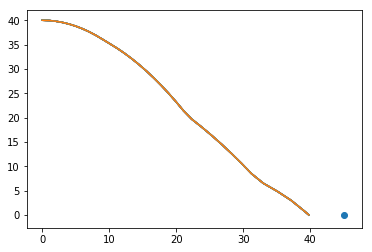

loss: 1244.04, 	 normalized loss: 0.0907923651514, 	 len(A): 13702
loss: 1242.59, 	 normalized loss: 0.0906869100143, 	 len(A): 13702
loss: 1242.08, 	 normalized loss: 0.0906496528221, 	 len(A): 13702
loss: 1241.65, 	 normalized loss: 0.0906178568109, 	 len(A): 13702
loss: 1241.25, 	 normalized loss: 0.0905888314805, 	 len(A): 13702
loss: 1240.87, 	 normalized loss: 0.0905615344846, 	 len(A): 13702
loss: 1240.5, 	 normalized loss: 0.090534495848, 	 len(A): 13702
loss: 1240.13, 	 normalized loss: 0.090507519574, 	 len(A): 13702
loss: 1239.78, 	 normalized loss: 0.0904813629226, 	 len(A): 13702
loss: 1239.43, 	 normalized loss: 0.0904559457133, 	 len(A): 13702
loss: 1239.09, 	 normalized loss: 0.0904311343121, 	 len(A): 13702
loss: 1238.75, 	 normalized loss: 0.090406741631, 	 len(A): 13702
loss: 1238.43, 	 normalized loss: 0.0903829191222, 	 len(A): 13702
loss: 1238.11, 	 normalized loss: 0.0903598627823, 	 len(A): 13702
loss: 1237.79, 	 normalized loss: 0.0903367975335, 	 len(A): 13702

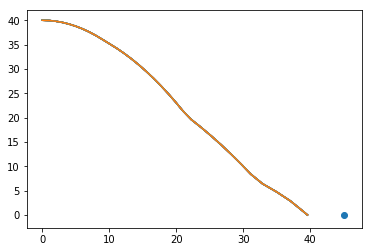

loss: 1270.29, 	 normalized loss: 0.0901044980061, 	 len(A): 14098
loss: 1268.84, 	 normalized loss: 0.09000165866, 	 len(A): 14098
loss: 1268.35, 	 normalized loss: 0.0899668506975, 	 len(A): 14098
loss: 1267.92, 	 normalized loss: 0.0899360170769, 	 len(A): 14098
loss: 1267.51, 	 normalized loss: 0.0899072528849, 	 len(A): 14098


In [ ]:
num_batch = 100
num_episodes = 12 # 10
max_step = 1000 # 10k
effort_scale = 200.0
n_steps = 10
optimal_total_reward = -1e9
A_end = []
B_end = []
A = []
B = []
for batch in range(num_batch):

    episode_max_reward = -1e9
    for episode in range(num_episodes):
        if episode%10 == 0:
            print('Episode: ' + str(episode))
        epsilon = get_epsilon(0.99, 0.1, episode, 10)
        Y, X, V = [], [], []
        episode_list = list()
        total_cost = 0.0
        total_reward = 0.0
        state = env.reset()
        # state_disc = get_discrete_states(state_cont, all_state_arrays)
        effort_reward = 0.0
        effort_cost = 0.0
        num_control_effort = 0
        for step in range(max_step):
            state_action_1 = env.probe_step(1.0)
            state_action_0 = env.probe_step(0.0)
            state_action_minus_1 = env.probe_step(-1.0)
            
            state_action_1 = env.probe_n_step(1.0, n_steps, False)
            state_action_0 = env.probe_n_step(0.0, n_steps, False)
            state_action_minus_1 = env.probe_n_step(-1.0, n_steps, False)
            
            # state_action_1 = [state_action_1[0], state_action_1[2]]
            # state_action_0 = [state_action_0[0], state_action_0[2]]
            # state_action_minus_1 = [state_action_minus_1[0], state_action_minus_1[2]]
            
            state_action_1 = state_action_1[0:5]
            state_action_0 = state_action_0[0:5]
            state_action_minus_1 = state_action_minus_1[0:5]
            
            # Q_1 = sess.run(Q_net, {x_Q_net : [state_action_1 + [1],]})
            # Q_0 = sess.run(Q_net, {x_Q_net : [state_action_0 + [0],]})
            # Q_m1 = sess.run(Q_net, {x_Q_net : [state_action_minus_1 + [-1],]})
            
            Q_1 = sess.run(Q_net, {x_Q_net : [state_action_1,]})
            Q_0 = sess.run(Q_net, {x_Q_net : [state_action_0,]})
            Q_m1 = sess.run(Q_net, {x_Q_net : [state_action_minus_1,]})
                        
            # min_Q_index = np.argmax([Q_m1, Q_0 + 1.0/effort_scale*w_effort, Q_1])
            max_Q_index = np.argmax([Q_m1, Q_0, Q_1])
            # print('\t \t step: ' + str(step) + ', \t Q1: ' + str(Q_1) + ', \t Q0: ' + str(Q_0) + ', \t Qm1: ' + str(Q_m1))
            # print(Q_1)
            # print(Q_0)
            # print(Q_m1)
            # print(' ')      
            action_opt = ACTIONS[max_Q_index]
            
            # print('ep: ' + str(episode) + ', \t Q_m1: ' + str(Q_m1) + ' \t Q_0: ' + str(Q_0) + ', \t Q_1: ' + str(Q_1))
            # print('   action: ' + str(action_opt))
            
            actions_ind0 = copy.deepcopy(ACTIONS[0])
            tot_actions = copy.deepcopy(ACTIONS)
            tot_actions[0] = action_opt
            tot_actions[max_Q_index] = actions_ind0
            weight_array = [0.5, 0.25, 0.25]
            # w_opt = min(1.0/3.0 + batch*0.05, 1.0)
            if batch == 0:
                w_opt = min(1 - 2.0/3.0/(1.0+0.1*batch), 1) # /(1.0+0.01*step)
            else:
                w_opt = 1.0 - 0.05/(1.5**batch) # min(1 - 0.05/(batch), 1)
            # w_opt = 1.0
            weight_array = [w_opt, (1.0-w_opt)/2, (1.0-w_opt)/2]
            # action = np.random.choice(tot_actions, 1, p=weight_array)[0]
            if step%1 == 0:
                # action = random.choice(ACTIONS)
                # print(str(action))
                action = np.random.choice(tot_actions, 1, p=weight_array)[0]
                # action = 1
                # print(tot_actions)
                # print(str(action))
            if action != 0:
                num_control_effort += 1
            # action = np.random.choice(ACTIONS)
            # action = np.random.choice(tot_actions, 1, p=weight_array)[0]
            # cost, done = env.step(action)
            cost, done = env.probe_n_step(action, 10, True)
            if cost == 0.0:
                reward = 0.0
            else:
                reward = -1.0*w_effort/effort_scale
            new_state = env.get_state()
            total_cost += cost
            episode_list.append((state, action, reward))                
            state = new_state
            if done:
                state = env.get_state()
                episode_list.append((state, action, cost))
                break
            effort_reward += reward
            effort_cost += cost                

        effort_cost = effort_cost/effort_scale
        glider_landing_x = episode_list[len(episode_list)-1][0][0]
        target_cost = abs(target_x - glider_landing_x)
        target_reward = 10.0 - 2*abs(target_x - glider_landing_x)
        total_cost = w_target*target_cost + w_effort*effort_cost
        total_reward = w_target*target_reward # + w_effort*effort_reward

        A_end, B_end = training_data_inv_final(episode_list, total_reward, w_effort, effort_scale)
        # A_end.extend(A_episode)
        # B_end.extend(B_episode)
        
        if total_reward > episode_max_reward:
            episode_max_reward = total_reward
        
        if total_reward > optimal_total_reward:
            print('new max')
            optimal_total_reward = total_reward
            optimal_episode_list = episode_list
            
        # train MLP   
        
        A_episode, B_episode = training_data_inv(episode_list, total_reward, w_effort, effort_scale)
        # A.extend(A_end)
        A.extend(A_episode)
        #B.extend(B_end)
        B.extend(B_episode)

        # A, B = training_data_inv(episode_list, total_reward, w_effort, effort_scale)
        # labels = np.transpose([B])
        # predictions = sess.run(Q_net, {x_Q_net: A})
    # y_label = np.transpose([B])
        
        plot_trajectory(episode_list)
        plt.hold
    plt.scatter(x_target,0)
    plt.show()
    
    A_opt_episode, B_opt_episode = training_data_inv(optimal_episode_list, optimal_total_reward, w_effort, effort_scale)
    # A.extend(A_opt_episode)
    # B.extend(B_opt_episode)
    
    # A_episode, B_episode = training_data_inv(episode_list, total_reward, w_effort, effort_scale)
    # A.extend(A_end)
    # A.extend(A_episode)
    #B.extend(B_end)
    # B.extend(B_episode)
        
    loss = tf.losses.mean_squared_error(y_Q_net, Q_net)
    if batch == 0:
        training_rate = 1e-9
    
    train_step = tf.train.GradientDescentOptimizer(training_rate).minimize(loss)

    for j in range(10000):
        _, loss_value = sess.run([train_step, loss], feed_dict={x_Q_net:A, y_Q_net:B})
        if j%200 == 0:
            print('loss: ' + str(loss_value) + ', \t normalized loss: ' + str(loss_value/len(A)) + ', \t len(A): ' + str(len(A)))
    # _, loss_value = sess.run([train_step, loss], feed_dict={x_Q_net:A, y_Q_net:B})
    # sess.run([train_step, loss], feed_dict={x_Q_net:[[1,2,3,4,5],], y_Q_net:[[1]]})

    # print('   episode: ' + str(episode) + ', \t total_cost: ' + str(total_cost) + ', \t loss: ' + str(sess.run(loss)))

    """
    loss = tf.losses.mean_squared_error(y, y_)
    train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
    # print(sess.run(loss))

    # print(sess.run([train_step, loss], feed_dict={x:[[1,2,3,4,5],[2,3,4,5,6]], y:[[1],[2]]}))
    print(sess.run([train_step, loss], feed_dict={x:[[1,2,3,4,5],], y:[[1]]}))
    """
    # plot trajectory
    """ if episode%2 == 0:
        print(episode)
        plot_trajectory(episode_list)
        plt.hold
        plt.show()"""
    """if (episode-1)%2 == 0:
        print(episode)
        plot_trajectory(episode_list)
        plt.hold
        plt.show()"""

    print('target_reward: ' + str(episode_max_reward) + ', \t target_cost: ' + str(target_cost) + ', \t num_control_effort: ' + str(num_control_effort))
    print('   episode: ' + str(episode) + ', \t reward: ' + str(episode_max_reward) + ', \t cost: ' + str(total_cost) + ', \t loss: ' + str(loss_value) + ', \t w_opt: ' + str(w_opt))

In [ ]:
min(0.03*0*min(0.03*i, 1)

In [ ]:
A_episode

In [ ]:
weight_array[1]

In [ ]:
D = [[0,1],[2,3]]
D.extend(D)
D

In [ ]:
D = [[0,1],[2,3]]
D.append(D)
D

In [ ]:
glider_landing_x

In [ ]:
effort_cost

In [ ]:
a = 1
if a!=2:
    print(1)

In [ ]:
# Working neural net

import tensorflow as tf

num_input = 5
num_l1 = 10
num_l2 = 10
num_out = 1
W = {
    'h1':tf.Variable(tf.random_normal([num_input,num_l1])),
    'h2':tf.Variable(tf.random_normal([num_l1, num_l2])),
    'out':tf.Variable(tf.random_normal([num_l2, num_out]))
}    
b = {
    'b1':tf.Variable(tf.random_normal([num_l1])),
    'b2':tf.Variable(tf.random_normal([num_l2])),
    'out':tf.Variable(tf.random_normal([num_out]))
}

def multilayer_perceptron(x, W, b):        
    l1 = tf.add(tf.matmul(x, W['h1']), b['b1'])
    l1 = tf.nn.relu(l1)
    l2 = tf.add(tf.matmul(l1, W['h2']), b['b2'])
    l2 = tf.nn.relu(l2)
    out = tf.add(tf.matmul(l2, W['out']), b['out'])
    return out

sess = tf.Session()
x = tf.placeholder("float", [None,num_input])
y = tf.placeholder("float", [None, 1]) # , name = 'y')   # 3 outputs
y_ = multilayer_perceptron(x, W, b)
sess.run(tf.initialize_all_variables())

# y = tf.placeholder(tf.float32, [None, 1]) # , name = 'y')   # 3 outputs
# labels = y
# predictions = a
loss = tf.losses.mean_squared_error(y, y_)
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

# a = multilayer_perceptron(x)
# print(sess.run(a))
print(sess.run([train_step, loss], feed_dict={x:[[1,2,3,4,5],[2,3,4,5,6]], y:[[1],[2]]}))
# print(sess.run(loss))
# sess.run(train_step)
# print(sess.run(a))
# print(sess.run(loss))

for i in range(100):
    print(sess.run([train_step, loss], feed_dict={x:[[1,2,3,4,5],], y:[[1]]}))
    # print(sess.run(loss))

In [ ]:
# multiple inputs/outputs

import tensorflow as tf

A, B = training_data(episode_list, total_cost, w_effort)

sess = tf.Session()
x = tf.Variable(A)
a = multilayer_perceptron(x)
print(a)
labels = np.transpose([B])
predictions = multilayer_perceptron(x)
loss = tf.losses.mean_squared_error(labels, predictions)
train_step = tf.train.GradientDescentOptimizer(1e-8).minimize(loss)
sess.run(tf.initialize_all_variables())
# a = multilayer_perceptron(x)
# print(sess.run(a))
print(sess.run(loss))
sess.run(train_step)
# print(sess.run(a))
print(sess.run(loss))

for i in range(100000):
    sess.run(train_step)
    # print(sess.run(a))
    if i%1000 == 0:
        print(sess.run(loss))

In [ ]:
a, b = training_data(episode_list, total_cost, w_effort)
a

In [ ]:
X_NN0 = training_data(episode_list, total_cost, w_effort)

In [ ]:
episode_list[len(episode_list)-2][2]

In [ ]:
plot_trajectory(episode_list)

In [ ]:
len(episode_list)

In [ ]:
import tensorflow

In [ ]:
action = random.choice(ACTIONS)
action

In [ ]:
 X, Y, A = [], [], [],
for i in range(len(episode_list)):
    state = episode_list[i][0]
    X.append(state[0])
    Y.append(state[2])
    A.append(episode_list[i][1])

In [ ]:
episode_list

In [ ]:
state = env.reset()
env.get_state()

In [ ]:
env.step(1.0)
env.get_state()

In [ ]:
plt.show()

In [ ]:
done

In [ ]:
x = tf.Variable([[0.0,1.0,2.0,3.0,4.0],])
# multilayer_perceptron(x)
num_input = 5 
num_l1 = 2
W = {'h1':tf.Variable(tf.random_normal([num_input,num_l1]))}
a = tf.matmul(x, W['h1'])
# W['h1']
sess = tf.Session()
print(W['h1'])
sess.run(tf.global_variables_initializer())
print(sess.run(W['h1']))
print(sess.run(x))
print(sess.run(a))

In [ ]:
x = tf.Variable([[0.0,1.0,2.0,3.0,4.0],])
a = multilayer_perceptron(x)
print(a)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(a))
sess.close()

In [ ]:
print(sess.run(a))

In [ ]:
labels

In [ ]:
model_result = sess.run(a , {x : [[0.0,1.0,2.0,3.0,4.0],]})
model_result[0][0]

In [ ]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
 
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

def multilayer_perceptron(x, weights, biases):
    # Hidden layer with ReLU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with ReLU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
 
# Store layers weight &amp; bias
weights = {
'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
'b1': tf.Variable(tf.random_normal([n_hidden_1])),
'b2': tf.Variable(tf.random_normal([n_hidden_2])),
'out': tf.Variable(tf.random_normal([n_classes]))
}
 
# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [ ]:
a = np.argmin([1,0,-3])
a

In [ ]:
min_Q_index = 2
ACTIONS[min_Q_index]